In [132]:
# Dependencies
import tweepy
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [76]:
# Import Twitter API Keys
from config3 import consumer_key, consumer_secret, access_token, access_token_secret
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [77]:
# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

In [120]:
#Create lists for data frame
target_users = ["@BBCWorld", "@CBS", "@CNN", "@FoxNews", "@nytimes"]
tweets_ago = []
tweet_texts= [] 
dates = []
positive = []
negative = []
neutral = []
compound = [] 

In [121]:
for user in target_users:
    
    public_tweets = api.user_timeline(user, count = 100)
    counter = 0
    
    for tweet in public_tweets:
 
        # Run Vader Analysis on each tweet
        results = analyzer.polarity_scores(tweet["text"])
        
        # Add each value to the appropriate array
        compound.append(results["compound"])
        positive.append(results["pos"])
        neutral.append(results["neu"])
        negative.append(results["neg"])
       
        # Store Tweet in Array
        tweet_texts.append(tweet["text"])
        counter += 1
        tweets_ago.append(counter)

In [123]:
tweets_bbc_df = pd.DataFrame({ 
    "Tweets Ago":tweets_ago[:100],
    "Tweets": tweet_texts[:100], 
    #"Date": dates, 
    "Positive": positive[:100], 
    "Neutral": neutral[:100], 
    "Negative": negative[:100], 
    "Compound": compound[:100]})
    
tweets_bbc_df

Compound  Negative  Neutral  Positive  \
0     0.0000     0.000    1.000     0.000   
1     0.0000     0.000    1.000     0.000   
2    -0.8271     0.461    0.539     0.000   
3    -0.2500     0.258    0.565     0.177   
4     0.0000     0.000    1.000     0.000   
5     0.0000     0.000    1.000     0.000   
6     0.0000     0.000    1.000     0.000   
7    -0.5423     0.360    0.640     0.000   
8     0.0000     0.000    1.000     0.000   
9     0.0000     0.000    1.000     0.000   
10    0.0000     0.000    1.000     0.000   
11    0.3565     0.051    0.836     0.113   
12    0.8470     0.000    0.686     0.314   
13    0.3919     0.000    0.897     0.103   
14    0.2960     0.000    0.864     0.136   
15   -0.7096     0.396    0.604     0.000   
16    0.0000     0.000    1.000     0.000   
17    0.0000     0.000    1.000     0.000   
18    0.0772     0.000    0.843     0.157   
19   -0.2960     0.216    0.784     0.000   
20    0.0000     0.000    1.000     0.000   
21    0.0000     0.000    1.000     0.000   
22    0.0000     0.000    1.000     0.000   
23    0.0000     0.000    1.000     0.000   
24    0.0000     0.000    1.000     0.000   
25    0.3400     0.100    0.692     0.208   
26    0.0000     0.000    1.000     0.000   
27    0.5859     0.000    0.678     0.322   
28   -0.0500     0.141    0.727     0.133   
29   -0.1027     0.189    0.811     0.000   
..       ...       ...      ...       ...   
70   -0.4767     0.317    0.559     0.124   
71    0.0000     0.000    1.000     0.000   
72    0.0000     0.000    1.000     0.000   
73    0.3182     0.000    0.753     0.247   
74    0.0000     0.000    1.000     0.000   
75    0.0000     0.000    1.000     0.000   
76    0.0000     0.000    1.000     0.000   
77   -0.7269     0.319    0.681     0.000   
78    0.0000     0.000    1.000     0.000   
79    0.0000     0.000    1.000     0.000   
80   -0.1531     0.182    0.698     0.120   
81    0.2732     0.000    0.769     0.231   
82    0.0000     0.000    1.000     0.000   
83    0.0000     0.000    1.000     0.000   
84    0.0000     0.000    1.000     0.000   
85    0.0000     0.000    1.000     0.000   
86    0.3071     0.000    0.876     0.124   
87    0.5267     0.000    0.804     0.196   
88   -0.1027     0.123    0.877     0.000   
89   -0.7351     0.470    0.530     0.000   
90    0.0000     0.000    1.000     0.000   
91    0.0000     0.000    1.000     0.000   
92    0.0000     0.000    1.000     0.000   
93    0.0000     0.000    1.000     0.000   
94    0.0000     0.000    1.000     0.000   
95    0.0000     0.000    1.000     0.000   
96    0.0000     0.000    1.000     0.000   
97    0.0000     0.000    1.000     0.000   
98    0.1027     0.000    0.928     0.072   
99   -0.4019     0.278    0.722     0.000   

                                               Tweets  Tweets Ago  
0   Five things Saudi women still can't do https:/...           1  
1   Australia cements Solomon Islands deal amid Ch...           2  
2   Yemen war: Saudi-backed forces begin assault o...           3  
3   China's telco giant ZTE sees shares collapse 3...           4  
4   Ten-year old Hermes Birkin handbag sells for £...           5  
5   RT @SallyBundockBBC: What is your take on the ...           6  
6   Hidden writing in ancient desert monastery man...           7  
7   Letter from Africa: Why has Nigeria rejected p...           8  
8   Canada-US trade: How Trudeau might hit back ag...           9  
9   Did Trump and Kim really achieve anything? htt...          10  
10  'Wake up Punchy!' Trump hits back at Robert De...          11  
11  RT @BBCJonSopel: watching warily. Interesting ...          12  
12  RT @BBCJonSopel: South Korea has been the most...          13  
13  RT @BBCJonSopel: North Korea has given up the ...          14  
14  RT @BBCJonSopel: Join me now as I start taking...          15  
15  Trump Kim summit: Pentagon remains 'ironclad' ...          16  
16  Trump-Kim summit: The hidden messages in their...    

In [124]:
tweets_CBS_df = pd.DataFrame({ 
    "Tweets Ago":tweets_ago[100:200],
    "Tweets": tweet_texts[100:200], 
    #"Date": dates, 
    "Positive": positive[100:200], 
    "Neutral": neutral[100:200], 
    "Negative": negative[100:200], 
    "Compound": compound[100:200]})
    
tweets_CBS_df

Compound  Negative  Neutral  Positive  \
0    -0.5562     0.315    0.551     0.134   
1     0.5093     0.000    0.829     0.171   
2    -0.2960     0.167    0.833     0.000   
3     0.0000     0.000    1.000     0.000   
4     0.0000     0.000    1.000     0.000   
5     0.4767     0.000    0.780     0.220   
6     0.8478     0.000    0.594     0.406   
7     0.9200     0.000    0.537     0.463   
8     0.0000     0.000    1.000     0.000   
9     0.4404     0.000    0.847     0.153   
10    0.8360     0.000    0.533     0.467   
11    0.0000     0.000    1.000     0.000   
12    0.6369     0.000    0.682     0.318   
13    0.7978     0.000    0.457     0.543   
14    0.9523     0.000    0.450     0.550   
15    0.5994     0.000    0.698     0.302   
16    0.4215     0.000    0.877     0.123   
17    0.8932     0.000    0.483     0.517   
18    0.0000     0.000    1.000     0.000   
19    0.0000     0.000    1.000     0.000   
20    0.8908     0.000    0.509     0.491   
21    0.0000     0.000    1.000     0.000   
22    0.4926     0.000    0.738     0.262   
23    0.5093     0.000    0.477     0.523   
24    0.7579     0.000    0.435     0.565   
25    0.6467     0.000    0.752     0.248   
26    0.0000     0.000    1.000     0.000   
27    0.6360     0.000    0.724     0.276   
28    0.8834     0.000    0.437     0.563   
29    0.0000     0.000    1.000     0.000   
..       ...       ...      ...       ...   
70   -0.4404     0.177    0.723     0.100   
71    0.4574     0.000    0.824     0.176   
72    0.5093     0.000    0.845     0.155   
73    0.0000     0.000    1.000     0.000   
74    0.0000     0.000    1.000     0.000   
75   -0.3903     0.131    0.807     0.062   
76    0.8442     0.000    0.664     0.336   
77    0.8932     0.000    0.545     0.455   
78    0.4926     0.000    0.849     0.151   
79    0.0000     0.000    1.000     0.000   
80    0.0000     0.000    1.000     0.000   
81    0.6239     0.000    0.789     0.211   
82    0.5859     0.000    0.826     0.174   
83    0.1139     0.000    0.917     0.083   
84    0.0000     0.000    1.000     0.000   
85    0.0000     0.000    1.000     0.000   
86    0.3382     0.061    0.808     0.131   
87    0.1867     0.000    0.920     0.080   
88    0.4199     0.000    0.715     0.285   
89    0.0000     0.000    1.000     0.000   
90    0.3595     0.000    0.849     0.151   
91    0.7177     0.000    0.715     0.285   
92    0.1867     0.000    0.907     0.093   
93    0.0000     0.000    1.000     0.000   
94    0.5562     0.000    0.854     0.146   
95    0.7500     0.000    0.758     0.242   
96    0.5574     0.000    0.841     0.159   
97    0.3802     0.000    0.890     0.110   
98    0.3400     0.000    0.888     0.112   
99    0.5859     0.000    0.826     0.174   

                                               Tweets  Tweets Ago  
0   No pain, no gain, ALL Hart! Just one month unt...           1  
1   RT @TheNeighborhood: Welcome to #TheNeighborho...           2  
2   In case you missed it, watch the entire #TonyA...           3  
3   How do you know @SaraBareilles and @joshgroban...           4  
4   Here are all the performances from the 2018 #T...           5  
5   See the complete list of winners from the 2018...           6  
6   An end to a magical evening. The Band's Visit ...           7  
7   Congratulations are in order for @TheKatrinaLe...           8  
8   RT @CBSThisMorning: Hmm... something seems off...           9  
9   RT @_stobin13: watching the #TonyAwards after ...          10  
10  Tony Shalhoub wins Best Leading Actor in a Mus...          11  
11  The Boss looks right at home on the #TonyAward...          12  
12  RT @Aatamianphoto: Springsteen is on the #Tony...          13  
13  Inspiration: Get to your YES! #OnceOnThisIslan...          14  
14  The feeling when you win a Tony. 🙌 Congratulat...          15  
15  What a beautiful performance by the cast of #T...          16  
16  "I'm a living example of how theatre can chang...    

In [125]:
tweets_CNN_df = pd.DataFrame({ 
    "Tweets Ago":tweets_ago[200:300],
    "Tweets": tweet_texts[200:300], 
    #"Date": dates, 
    "Positive": positive[200:300], 
    "Neutral": neutral[200:300], 
    "Negative": negative[200:300], 
    "Compound": compound[200:300]})
    
tweets_CNN_df

Compound  Negative  Neutral  Positive  \
0    -0.2023     0.142    0.748     0.110   
1     0.0000     0.000    1.000     0.000   
2     0.0000     0.000    1.000     0.000   
3     0.2023     0.000    0.924     0.076   
4    -0.5574     0.247    0.592     0.161   
5     0.5859     0.000    0.730     0.270   
6     0.0000     0.000    1.000     0.000   
7     0.0000     0.000    1.000     0.000   
8     0.0258     0.000    0.932     0.068   
9     0.0000     0.000    1.000     0.000   
10   -0.0258     0.139    0.728     0.132   
11    0.7430     0.000    0.730     0.270   
12   -0.1027     0.057    0.943     0.000   
13   -0.0258     0.197    0.563     0.239   
14    0.3400     0.082    0.753     0.164   
15    0.0000     0.000    1.000     0.000   
16   -0.4767     0.134    0.866     0.000   
17    0.0000     0.000    1.000     0.000   
18    0.5859     0.000    0.858     0.142   
19   -0.2732     0.104    0.896     0.000   
20   -0.3612     0.197    0.717     0.085   
21   -0.4588     0.240    0.660     0.101   
22    0.7184     0.000    0.750     0.250   
23    0.6486     0.000    0.773     0.227   
24    0.4871     0.000    0.884     0.116   
25    0.7184     0.000    0.700     0.300   
26    0.5859     0.000    0.725     0.275   
27    0.0000     0.000    1.000     0.000   
28   -0.4019     0.226    0.658     0.115   
29   -0.1280     0.059    0.941     0.000   
..       ...       ...      ...       ...   
70   -0.3612     0.116    0.884     0.000   
71    0.0000     0.000    1.000     0.000   
72    0.0000     0.000    1.000     0.000   
73    0.4588     0.000    0.870     0.130   
74   -0.2960     0.137    0.789     0.074   
75   -0.2732     0.152    0.760     0.088   
76    0.0000     0.000    1.000     0.000   
77    0.7430     0.000    0.730     0.270   
78    0.0000     0.000    1.000     0.000   
79   -0.3400     0.118    0.882     0.000   
80    0.0000     0.000    1.000     0.000   
81    0.0000     0.000    1.000     0.000   
82    0.0000     0.000    1.000     0.000   
83    0.4215     0.000    0.865     0.135   
84   -0.6808     0.332    0.579     0.089   
85    0.7615     0.000    0.745     0.255   
86    0.0000     0.000    1.000     0.000   
87    0.0000     0.000    1.000     0.000   
88    0.0000     0.000    1.000     0.000   
89   -0.4019     0.124    0.876     0.000   
90   -0.1280     0.129    0.763     0.108   
91    0.3400     0.000    0.882     0.118   
92   -0.4767     0.140    0.860     0.000   
93    0.2023     0.000    0.924     0.076   
94   -0.3612     0.143    0.857     0.000   
95   -0.3182     0.130    0.795     0.075   
96    0.2003     0.099    0.766     0.135   
97    0.0000     0.000    1.000     0.000   
98    0.0000     0.000    1.000     0.000   
99    0.0000     0.000    1.000     0.000   

                                               Tweets  Tweets Ago  
0   742 kids have died of heatstroke in vehicles i...           1  
1   Folk singer Joni Mitchell wrote the song "Rive...           2  
2   Read the full text of the Trump-Kim signed sta...           3  
3   Meet Porsche's first fully electric car: The T...           4  
4   Samuel Tom Holiday, one of the longest survivi...           5  
5   Netflix is now worth more than Disney. It’s va...           6  
6   Alec Baldwin 2020? During an interview with Ho...           7  
7   George H.W. Bush has become the first former U...           8  
8   Donald Trump Jr. will speak at a Montana dinne...           9  
9   Polio re-emerges in Venezuela nearly 30 years ...          10  
10  Trump had a chance to cut Canada's dairy tarif...          11  
11  President Trump pitched a message of peace bet...          12  
12  The view from a prop plane, helicopter -- or e...          13  
13  A Democratic candidate who admitted to domesti...          14  
14  RT @CNNTonight: President Trump is firing back...          15  
15  Meet the master architect behind Japan's remot...          16  
16  RT @CuomoPrimeTime: .@ChrisCuomo: “President T...    

In [126]:
tweets_FoxNews_df = pd.DataFrame({ 
    "Tweets Ago":tweets_ago[300:400],
    "Tweets": tweet_texts[300:400], 
    #"Date": dates, 
    "Positive": positive[300:400], 
    "Neutral": neutral[300:400], 
    "Negative": negative[300:400], 
    "Compound": compound[300:400]})
    
tweets_FoxNews_df

Compound  Negative  Neutral  Positive  \
0     0.7351     0.000    0.625     0.375   
1     0.7845     0.000    0.653     0.347   
2     0.6115     0.000    0.834     0.166   
3    -0.8020     0.427    0.573     0.000   
4     0.0000     0.000    1.000     0.000   
5     0.7184     0.000    0.720     0.280   
6     0.0000     0.000    1.000     0.000   
7     0.0000     0.000    1.000     0.000   
8     0.0000     0.000    1.000     0.000   
9    -0.2263     0.128    0.872     0.000   
10    0.5558     0.120    0.634     0.246   
11    0.0000     0.000    1.000     0.000   
12   -0.4404     0.172    0.828     0.000   
13    0.7783     0.000    0.702     0.298   
14   -0.5255     0.184    0.816     0.000   
15    0.6369     0.000    0.811     0.189   
16    0.3818     0.000    0.860     0.140   
17    0.0000     0.000    1.000     0.000   
18    0.0000     0.000    1.000     0.000   
19    0.0772     0.000    0.909     0.091   
20    0.6597     0.000    0.769     0.231   
21   -0.4588     0.188    0.812     0.000   
22    0.3182     0.000    0.867     0.133   
23    0.4404     0.000    0.854     0.146   
24    0.0000     0.000    1.000     0.000   
25   -0.8779     0.591    0.409     0.000   
26    0.0000     0.000    1.000     0.000   
27    0.6486     0.000    0.751     0.249   
28    0.0000     0.000    1.000     0.000   
29    0.0000     0.000    1.000     0.000   
..       ...       ...      ...       ...   
70    0.0000     0.000    1.000     0.000   
71   -0.7783     0.565    0.435     0.000   
72   -0.0258     0.211    0.538     0.251   
73    0.0000     0.000    1.000     0.000   
74    0.0000     0.000    1.000     0.000   
75   -0.6486     0.304    0.607     0.089   
76    0.0000     0.000    1.000     0.000   
77   -0.3412     0.211    0.789     0.000   
78    0.0772     0.122    0.741     0.138   
79   -0.9186     0.667    0.333     0.000   
80    0.0000     0.000    1.000     0.000   
81    0.4404     0.000    0.838     0.162   
82    0.3182     0.000    0.892     0.108   
83    0.0000     0.000    1.000     0.000   
84    0.0000     0.000    1.000     0.000   
85    0.7650     0.000    0.708     0.292   
86    0.0000     0.000    1.000     0.000   
87    0.8204     0.000    0.665     0.335   
88   -0.5255     0.184    0.816     0.000   
89   -0.3818     0.126    0.874     0.000   
90    0.4019     0.000    0.769     0.231   
91    0.4466     0.000    0.804     0.196   
92    0.4019     0.000    0.816     0.184   
93    0.0000     0.000    1.000     0.000   
94    0.0000     0.000    1.000     0.000   
95    0.4404     0.000    0.775     0.225   
96    0.3384     0.000    0.870     0.130   
97    0.0000     0.000    1.000     0.000   
98    0.0000     0.000    1.000     0.000   
99    0.0000     0.000    1.000     0.000   

                                               Tweets  Tweets Ago  
0   Minnesota HS pitcher consoles friend after str...           1  
1   Parents of Otto Warmbier are hopeful 'somethin...           2  
2   .@POTUS: "One of the things I will tell you th...           3  
3   No smoke detectors found in home where 5 child...           4  
4   .@seanhannity: "President @realDonaldTrump mad...           5  
5   Samuel Tom Holiday, one of the last surviving ...           6  
6   .@POTUS: "You have a different administration....           7  
7     Pancakes or Hamburgers? https://t.co/p5VdRVQsZ1           8  
8   .@IngrahamAngle: "The left still will not give...           9  
9   Opioid lawsuit in Massachusetts is first to na...          10  
10  .@POTUS: "Anyone can make war, but only the mo...          11  
11  Trump-basher Mark Sanford, who president calle...          12  
12  MS-13 gang members among 91 arrests during 5-d...          13  
13  .@David_Bossie: “Barack Obama was handed the N...          14  
14  "Wake up Punchy!": @POTUS slams ‘low IQ' and '...          15  
15  .@KatiePavlich: "President Trump is one of the...          16  
16  .@DineshDSouza: “What a stunning contrast betw...    

In [127]:
tweets_nytimes_df = pd.DataFrame({ 
    "Tweets Ago":tweets_ago[400:500],
    "Tweets": tweet_texts[400:500], 
    #"Date": dates, 
    "Positive": positive[400:500], 
    "Neutral": neutral[400:500], 
    "Negative": negative[400:500], 
    "Compound": compound[400:500]})
    
tweets_nytimes_df

Compound  Negative  Neutral  Positive  \
0    -0.2500     0.087    0.913     0.000   
1    -0.5719     0.343    0.657     0.000   
2     0.0000     0.000    1.000     0.000   
3     0.0000     0.000    1.000     0.000   
4     0.0772     0.000    0.947     0.053   
5     0.2960     0.106    0.734     0.161   
6     0.6597     0.000    0.787     0.213   
7    -0.3400     0.179    0.821     0.000   
8     0.5627     0.000    0.764     0.236   
9     0.1779     0.168    0.559     0.273   
10   -0.5719     0.209    0.711     0.081   
11   -0.5574     0.141    0.859     0.000   
12    0.4019     0.000    0.803     0.197   
13    0.0000     0.000    1.000     0.000   
14    0.0000     0.000    1.000     0.000   
15    0.0000     0.000    1.000     0.000   
16   -0.1280     0.081    0.919     0.000   
17    0.0000     0.000    1.000     0.000   
18    0.4019     0.000    0.903     0.097   
19    0.0000     0.000    1.000     0.000   
20    0.7003     0.000    0.734     0.266   
21    0.0000     0.000    1.000     0.000   
22    0.0000     0.000    1.000     0.000   
23    0.0000     0.000    1.000     0.000   
24    0.0000     0.000    1.000     0.000   
25    0.0000     0.000    1.000     0.000   
26    0.0516     0.102    0.787     0.110   
27   -0.4939     0.132    0.868     0.000   
28    0.6369     0.000    0.729     0.271   
29   -0.5106     0.180    0.820     0.000   
..       ...       ...      ...       ...   
70   -0.5719     0.156    0.844     0.000   
71   -0.3400     0.167    0.726     0.107   
72   -0.0258     0.096    0.813     0.091   
73    0.1531     0.156    0.613     0.231   
74    0.6808     0.119    0.613     0.268   
75    0.4588     0.094    0.684     0.222   
76    0.1531     0.000    0.904     0.096   
77    0.0000     0.000    1.000     0.000   
78   -0.5574     0.167    0.833     0.000   
79   -0.9001     0.393    0.607     0.000   
80    0.0000     0.000    1.000     0.000   
81    0.0000     0.000    1.000     0.000   
82   -0.1027     0.072    0.928     0.000   
83   -0.2732     0.176    0.651     0.172   
84    0.6249     0.000    0.814     0.186   
85    0.0000     0.000    1.000     0.000   
86   -0.5859     0.262    0.654     0.084   
87    0.4939     0.000    0.811     0.189   
88    0.3818     0.000    0.874     0.126   
89   -0.4889     0.259    0.611     0.130   
90    0.0000     0.000    1.000     0.000   
91    0.0000     0.000    1.000     0.000   
92   -0.3182     0.119    0.881     0.000   
93    0.4939     0.000    0.873     0.127   
94   -0.6369     0.189    0.811     0.000   
95   -0.5826     0.201    0.799     0.000   
96    0.0000     0.000    1.000     0.000   
97    0.3818     0.000    0.795     0.205   
98    0.6369     0.000    0.826     0.174   
99    0.0000     0.000    1.000     0.000   

                                               Tweets  Tweets Ago  
0   RT @NYTFashion: The Guess co-founder Paul Marc...           1  
1   Arab Coalition Attacks Yemeni City in Bid to O...           2  
2   RT @NYTNational: Wildfires have burned across ...           3  
3   RT @nytpolitics: The joint statement called fo...           4  
4   If you’re a World Cup aficionado, you may want...           5  
5   Breaking News: Signaling how crucial loyalty t...           6  
6   Lots of smart technologists and futurists are ...           7  
7   New York Times Examines Work History of Report...           8  
8   This portable decompression chamber helps scie...           9  
9   Macedonia Agrees to Change Its Name to Resolve...          10  
10  Human cells resist gene editing by turning on ...          11  
11  “The fact that these trees just suddenly died ...          12  
12  Trying to fall asleep? Bob Ross is here to hel...          13  
13  Nevada election live results https://t.co/fX54...          14  
14  Updated: Our 2026 World Cup vote tracker. It’s...          15  
15  Greece had long opposed the name "Macedonia," ...          16  
16  Breaking News: The House will vote on 2 immigr...    

Text(0,0.5,'Tweet Polarity')

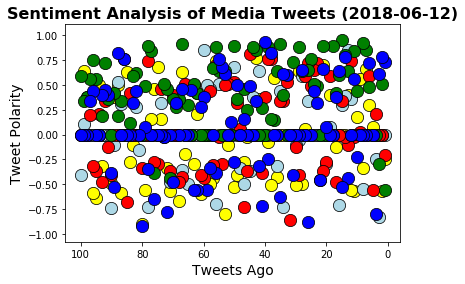

In [131]:
plt.scatter(tweets_nytimes_df["Tweets Ago"],tweets_nytimes_df["Compound"], s = 150, alpha =1, c = "Yellow", label = "NY Times", edgecolor = "Black", linewidths = 0.75)
plt.scatter(tweets_bbc_df["Tweets Ago"],tweets_bbc_df["Compound"], s = 150, alpha =1, c = "lightblue", label = "BBC", edgecolor = "Black", linewidths = 0.75)
plt.scatter(tweets_CNN_df["Tweets Ago"],tweets_CNN_df["Compound"], s = 150, alpha =1, c = "red", label = "CNN", edgecolor = "Black", linewidths = 0.75)
plt.scatter(tweets_CBS_df["Tweets Ago"],tweets_CBS_df["Compound"], s = 150, alpha =1, c = "green", label = "CBS", edgecolor = "Black", linewidths = 0.75)
plt.scatter(tweets_FoxNews_df["Tweets Ago"],tweets_FoxNews_df["Compound"], s = 150, alpha =1, c = "blue", label = "Fox News", edgecolor = "Black", linewidths = 0.75)

now = datetime.now()
now = now.strftime("%Y-%m-%d")
plt.xlim(max(tweets_nytimes_df["Tweets Ago"])+5, min(tweets_nytimes_df["Tweets Ago"])-5)
plt.title(f"Sentiment Analysis of Media Tweets ({now})", fontsize = 16, fontweight = "bold")
plt.xlabel("Tweets Ago", fontsize = 14)
plt.ylabel("Tweet Polarity", fontsize = 14)

In [135]:
overall = pd.DataFrame = ({
    "BBC":tweets_bbc_df["Compound"].mean(),
    "CNN":tweets_CNN_df["Compound"].mean(),
    "CBS":tweets_CBS_df["Compound"].mean(),
    "Fox News":tweets_FoxNews_df["Compound"].mean(),
    "NY Times": tweets_nytimes_df["Compound"].mean()
})

overall

{'BBC': 0.010955,
 'CBS': 0.351585,
 'CNN': 0.06210899999999999,
 'Fox News': 0.078985,
 'NY Times': -0.020967000000000003}

([<matplotlib.axis.XTick at 0x1aaa8e82438>,
 <a list of 5 Text xticklabel objects>)

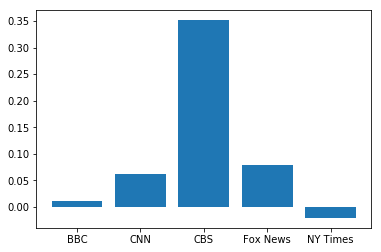

In [140]:
plt.bar(range(len(overall)), list(overall.values()),align = "center")

plt.xticks(range(len(overall)), list(overall.keys()))